Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

In [26]:
import selenium 
from bs4 import BeautifulSoup
from selenium import webdriver
import time 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException 
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
import datetime
from datetime import datetime, timezone
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
driver = webdriver.Chrome('chromedriver.exe')
driver.maximize_window()


In [3]:
def loginInsta() : 
    waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.TAG_NAME,"input")))
    text_boxes = driver.find_elements_by_tag_name('input')
    sampleUserName = 'Username'
    samplePassword = 'Password'
    username = text_boxes[0]
    password = text_boxes[1]
    username.send_keys(sampleUserName)
    password.send_keys(samplePassword)
    sub_btn = driver.find_element_by_xpath('//button[@type= "submit"]')
    sub_btn.click()

In [4]:
driver.get('https://www.instagram.com/')
loginInsta()
# close the save info window
waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"cmbtv")))
NotNowSection = driver.find_element_by_class_name("cmbtv")
NotNowSection.click()
# close the turn on post notification window
waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"HoLwm")))
NotNowSection = driver.find_element_by_class_name("HoLwm")
NotNowSection.click()

In [5]:
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "TqC_a")))
search_box = driver.find_element_by_class_name('TqC_a ')
search_box.click()
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "XTCLo")))
driver.find_element_by_class_name('XTCLo').send_keys('food')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3")))

# p =  driver.find_elements_by_xpath('//a[@class = "-qQT3"]/div/div[contains(@class,"vwCYk")]/div/div/div/div')
p =  driver.find_elements_by_xpath('//a[@class = "-qQT3"]')


In [6]:
foodPageslist = {}
for i in range(10):
    link = p[i].get_attribute('href')
    # Avoid tags just include usernames 
    if '/explore/tags/' in link:
        i -= 1
        continue
    foodPageslist[link] =0

In [7]:
def findNumOfFollowers():
    # Assuming we are on the profile page
    waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'g47SY')))
    nof = driver.find_elements_by_class_name("g47SY")[1].get_attribute('title')
    nof = nof.replace(',','')
    return float(nof)

In [8]:
print("First 10 Handles when searched for term 'Food' ")
for page,followers in foodPageslist.items():
    print(page)
    driver.get(page)
    nof = findNumOfFollowers()
    foodPageslist[page] = nof
time.sleep(10)    
#     /* We will save number of posts in this list only */
# driver.get('https://www.instagram.com/')


First 10 Handles when searched for term 'Food' 
https://www.instagram.com/food_tour_ent/
https://www.instagram.com/foodie___hum/
https://www.instagram.com/indian_tasty_food/
https://www.instagram.com/indorefooddage/
https://www.instagram.com/indorefoodexplorer/
https://www.instagram.com/addicted_food_/
https://www.instagram.com/food/
https://www.instagram.com/foodie_incarnate/
https://www.instagram.com/foody_bliss/


#### <p style = "color : Red">Now Wait until links of all ten pages gets printed. </p>

#### Top 5 accounts with Highest number of followers are : 

In [9]:

foll = sorted(foodPageslist.items(), key=lambda item: item[1],reverse = True)[:5]
foll
names = []
links = []
followers = []
print("Top 5 accounts with Highest number of followers are : ")
for f in foll:
    link = f[0]
    links.append(link)
    name  = link.replace('https://www.instagram.com/','')
    name = name.replace('/','')
    names.append(name)
    follower = f[1]
    followers.append(f[1])
    print(name , follower)

Top 5 accounts with Highest number of followers are : 
foodie_incarnate 1265821.0
food 163953.0
indorefoodexplorer 148419.0
foody_bliss 23527.0
indian_tasty_food 16044.0


 ### Number of post of a page in last three days


In [25]:
def NumofPostLast3Days():
    numOpost,i ,num_of_days,posttime = 0 ,0 , None,None
    flag = True
    currtime = datetime.now()
    while flag:
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        # find the time tag 
        waiter = WebDriverWait(driver,50).until(EC.presence_of_element_located((By.XPATH,"//a[@class = 'c-Yi7']/time")))
        posttime  = driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime')[:10]
        #convert time to comparable format
        posttime = datetime.strptime(posttime,'%Y-%m-%d')
        num_of_days = (currtime - posttime).days
        if num_of_days <= 3:
            numOpost += 1
        else :
            flag = False
        i+=1
        driver.back()
    return numOpost

In [39]:
print("Number of Posts by those accounts in last three days are as follows : ")

#Now again go on each handle and take out no. of post in last three days 
numofPosts = []
for i in range(len(links)):
    driver.get(links[i]) #go on the page. 
    #Scroll Down on each page. 
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    
    # function that returns number of post in last three days
    numPost = NumofPostLast3Days()
    print(names[i], " - " , numPost)
    numofPosts.append(numPost)


1
2022-02-19
2
2022-02-19
3
2022-02-18
4
2022-02-17
5
2022-02-16
6
2022-02-14
dilsefoodie  -  5
1
2022-02-19
2
2022-02-19
3
2022-02-18
4
2022-02-18
5
2022-02-17
6
2022-02-17
7
2022-02-16
8
2022-02-15
foodtalkindia  -  7
1
2022-02-18
2
2022-02-17
3
2022-02-16
4
2022-02-15
food  -  3
1
2022-02-19
2
2022-02-18
3
2022-02-18
4
2022-02-17
5
2022-02-16
6
2022-02-16
7
2022-02-15
delhifoodwalks  -  6
1
2022-02-19
2
2022-02-15
foody_bliss  -  1


In [40]:
print("linls")
print(links)
print('names')
print(names)
print('followers')
print(followers)
print('numofPosts')
print(numofPosts)

linls
['https://www.instagram.com/dilsefoodie/', 'https://www.instagram.com/foodtalkindia/', 'https://www.instagram.com/food/', 'https://www.instagram.com/delhifoodwalks/', 'https://www.instagram.com/foody_bliss/']
names
['dilsefoodie', 'foodtalkindia', 'food', 'delhifoodwalks', 'foody_bliss']
followers
[970877.0, 307856.0, 161731.0, 159969.0, 22233.0]
numofPosts
[5, 7, 3, 6, 1]


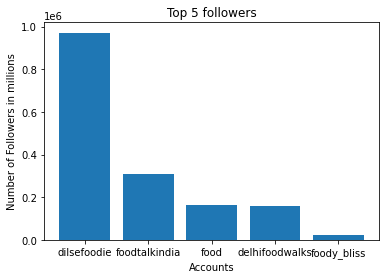

In [58]:
import matplotlib.pyplot as plt
plt.bar(names,followers)
plt.xlabel("Accounts")
plt.ylabel("Number of Followers in millions")
plt.title("Top 5 followers")
plt.show()

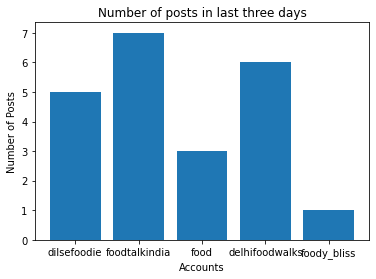

In [59]:
import matplotlib.pyplot as plt
plt.bar(names,numofPosts)
plt.xlabel("Accounts")
plt.ylabel("Number of Posts")
plt.title("Number of posts in last three days")
plt.show()

#### Your friend also needs a list of hashtags that he should use in his posts.
#### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
#### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
#### Create a csv file with two columns : the word and its frequency
#### Now, find the hashtags that were most popular among these bloggers
#### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [11]:
def Scrapecontent(numofposts,words):
    for i in range(numofposts):
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        #find content code 
        for x in driver.find_elements_by_class_name("xil3i"):
            words[x.text] = words.get(x.text,0)+1
        driver.back()

In [12]:
# open the first five handles and perform the fnction
words = {}
for i in range(len(links)):
    driver.get(links[i]) #go on the page. 
    #Scroll Down on each page. 
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    
    # Scrape the content of first 10 posts

    Scrapecontent(10,words)
print(words)

{'#foodieincarnate': 5, '#sodelhi': 6, '#newdelhi': 6, '#foodtalkindia': 6, '#delhigram': 6, '#indianfood': 6, '#delhifoodblogger': 6, '#foodgasm': 4, '#foodporn': 4, '#foodpornshare': 4, '#foodlover': 5, '#foodgram': 4, '#foodiesofinstagram': 4, '#foodie': 4, '#indianstreetfood': 5, '#streetfood': 6, '#delhistreetfood': 5, '#streetfoodindia': 4, '#mumbaistreetfood': 4, '#delhifoodie': 5, '#foodblogger': 5, '#indianfoodie': 6, '#desikhana': 5, '#indianfoodblogger': 5, '#indianfoodbloggers': 4, '#delhifood': 5, '#mumbai': 4, '#delhi': 4, '#chai': 2, '#ahmedabad': 1, '#Foodieincarnate': 5, '#reelitfeelit': 1, '#reelkarofeelkaro': 4, '#reelinstagram': 1, '#reels': 5, '#manchurian': 1, '#nagpur': 2, '#viralvideos': 2, '#viralfood': 2, '#desifood': 2, '#thali': 1, '#makhana': 1, '#paneer': 1, '#biharifood': 1, '#poori': 1, '#spinach': 1, '#indiancuisine': 1, '#regionalcuisine': 1, '#patnafood': 1, '#ruralindia': 1, '#mumbaifoodie': 2, '#foodmaniacindia': 1, '#foodofmumbai': 1, '#thingstodoi

In [13]:
with open('Content.csv','w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Hashtage","Freq"])
    for key,value in words.items():
        writer.writerow([key,value])    

In [42]:
import pandas as pd
Contentdf = pd.read_csv('Content.csv')
sortind = Contentdf['Freq'].argsort()[::-1]

             Hashtage  Freq
0    #foodieincarnate     5
1            #sodelhi     6
2           #newdelhi     6
3      #foodtalkindia     6
4          #delhigram     6
..                ...   ...
162        #balushahi     1
163  #walkwithanubhav     2
164      #littichokha     1
165      #streetfoods     1
166          #dhanbad     1

[167 rows x 2 columns]


In [46]:
frequency = Contentdf.iloc[sortind]['Freq'][:5]
keywords = Contentdf.iloc[sortind]['Hashtage'][:5]
frequency = frequency.values
keywords = keywords.values

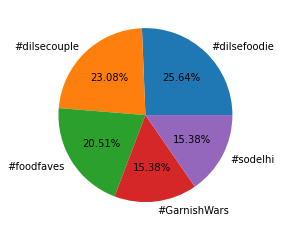

In [66]:
plt.pie(frequency ,labels =  keywords,autopct="%.2f%%" )
plt.title()
plt.show()

#### You need to also calculate average followers : likes ratio for the obtained handles.
####  Followers : Likes ratio is calculated as follows:
#### Find out the likes of the top 10 posts of the 5 handles obtained earlier.
#### Calculate the average likes for a handle.
#### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
#### Create a bar graph to depict the above obtained information.

1. Go on each profile
2. Go on each post (10 posts) 
3. Collect no. of likes , add them , divide by 10
4. divide the avg likes by num of followers that we already have 
5. Create a bar graph 

In [10]:
def collectAvgNumLikes(numofposts):
    totalLikes  = 0 
    for i in range(numofposts):
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        #find No. of likes 
        try :
            likeEl = driver.find_element_by_xpath("//div[contains(@class,'xLCgt') and contains(@class,'fDxYl')]/span")
            numLikes = float(likeEl.text.replace(',',''))
        except NoSuchElementException :
            try :
                button_like= WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.CLASS_NAME,"vcOH2")))
                driver.execute_script("arguments[0].click();", button_like)
                numLikes = float(driver.find_elements_by_xpath("//div[contains(@class,'vJRqr')]/span")[0].text.replace(',',''))
            except TimeoutException :
                numLikes = 0
        totalLikes += numLikes
        driver.back()
    avgLikes = totalLikes/numofposts
    return avgLikes

In [28]:
ratio = []
avgLikesList = []
for i in range(len(links)):
    driver.get(links[i]) #go on the page. 
    #Scroll Down on each page. 
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    driver.execute_script('window.scrollBy(0,9000);')
    time.sleep(2.5)
    
    # Go on first 10 posts and extract avg likes -> argument = number of posts
    avgLikes = collectAvgNumLikes(10)
    avgLikesList.append(avgLikes)
    ratio.append(avgLikes/followers[i])
print(ratio)    

[0.027351497565611567, 0.0047043969918208264, 0.0004446870009904392, 0.06373528286649381, 0.1237035651957118]


In [43]:
ratio = np.array(avgLikesList)/np.array(followers)
ratio = ratio * 100
plt.bar(names,ratio, color='orange')
plt.xlabel("Users")
plt.ylabel("Likes : follower Ratio")
plt.xticks(rotation=45, size=12)
plt.show()

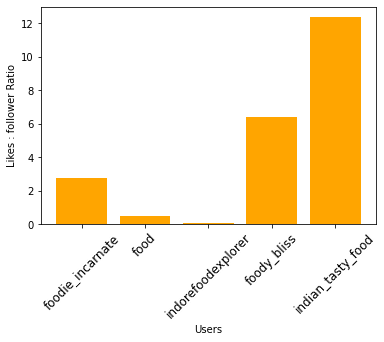

In [77]:
like_data = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']")
print(like_data.text)
print(like_data.get_attribute('innerHTML'))
BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser').find('span').text.replace(',','')

72,473 views
<div class="_9Ytll"><span class="vcOH2" role="button" tabindex="0"><div class="_7UhW9   xLCgt        qyrsm KV-D4          uL8Hv        T0kll "><span>72,473</span> views</div></span></div>


'72473 views'

In [39]:
datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
a = datetime.now()
b = datetime.strptime('2022-02-16', '%Y-%m-%d')
print(a,b)

2022-02-19 18:36:34.177732 2022-02-16 00:00:00


In [40]:
a = datetime.now()
(a-b).days

3

In [11]:
l = ['2022-01-24T07:43:54.000Z' ,'2022-01-22T07:43:54.000Z','2022-01-25T07:43:54.000Z']
import pandas as pd
dates = pd.DataFrame(l,columns = ['posttime'])
dates['posttime'] = pd.to_datetime(dates['posttime'])
import datetime
currtime = datetime.datetime.now()
print(type(currtime))
curr = [currtime]*3
print(type(curr[0]))
curr
dates['curr'] = curr
dates

<class 'datetime.datetime'>
<class 'datetime.datetime'>


,posttime,curr
0,2022-01-24 07:43:54+00:00,2022-02-10 22:39:05.008543
1,2022-01-22 07:43:54+00:00,2022-02-10 22:39:05.008543
2,2022-01-25 07:43:54+00:00,2022-02-10 22:39:05.008543


In [12]:
dates['posttime'] = dates['posttime'].dt.tz_localize(None)
dates['curr'] = dates['curr'].dt.tz_localize(None)

In [13]:
dates

,posttime,curr
0,2022-01-24 07:43:54,2022-02-10 22:39:05.008543
1,2022-01-22 07:43:54,2022-02-10 22:39:05.008543
2,2022-01-25 07:43:54,2022-02-10 22:39:05.008543


In [14]:
a = dates.iloc[0]['curr']

b= dates.iloc[0]['posttime']


(a-b).days

17

<!-- import datetime
   
/** Function to convert string to datetime
def convert(date_time):
    format = '%Y-%m-%d' # The format
    datetime_str = datetime.datetime.strptime(date_time, format)
   
    return datetime_str
   
/** Driver code
/** date_time = 'Dec 4 2018 10:07AM'
date_time  = '2022-01-26'

print(convert(date_time)) -->

In [52]:
driver.get('https://www.instagram.com/')


In [25]:
def NumofPostLast3Days()
    numOpost,i = 0 ,0
    flag = True
    currtime = datetime.now()
    while flag:
        waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
        print(i+1)
        p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
        POST_LINK = p.get_attribute('href')
        driver.get(POST_LINK)
        # find the time tag 
        waiter = WebDriverWait(driver,50).until(EC.presence_of_element_located((By.XPATH,"//a[@class = 'c-Yi7']/time")))
        posttime  = driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime')[:10]
        print(posttime)
        #convert time to comparable format
        posttime = datetime.strptime(posttime,'%Y-%m-%d')
        num_of_days = (currtime - posttime).days
        if num_of_days <= 3:
            numOpost += 1
        else :
            flag = False
        i+=1
        driver.back()
    return numOpost

1
2022-02-18
2
2022-02-17
3
2022-02-16
4
2022-02-15
3


In [13]:

for i in range(5):
    waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
    print(i+1)
    p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
    POST_LINK = p.get_attribute('href')
    driver.get(POST_LINK)
    # find the time tag 
    # driver.switch_to.frame(WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,"_9AhH0"))))
    waiter = WebDriverWait(driver,50).until(EC.presence_of_element_located((By.XPATH,"//a[@class = 'c-Yi7']/time")))
    print(driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime'))
    l.append(driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime'))
    driver.find_elements_by_class_name("c-Yi7")
    driver.back()

1
2022-02-19T14:45:37.000Z
2
2022-02-15T04:56:41.000Z
3
2022-02-13T13:58:57.000Z
4
2022-02-12T05:07:59.000Z
5
2022-02-09T13:52:25.000Z


In [12]:
l =[]

In [100]:
i =4
waiter = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'kIKUG')]/a")))
print(i+1)
p = driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[i]
POST_LINK = p.get_attribute('href')
driver.get(POST_LINK)
# find the time tag 
# driver.switch_to.frame(WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,"_9AhH0"))))
waiter = WebDriverWait(driver,50).until(EC.presence_of_element_located((By.XPATH,"//a[@class = 'c-Yi7']/time")))
print(driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime'))
l.append(driver.find_element_by_xpath("//a[@class = 'c-Yi7']/time").get_attribute('datetime'))
driver.find_elements_by_class_name("c-Yi7")
driver.back()

5
2022-01-30T14:11:28.000Z


In [88]:
driver.find_elements_by_xpath("//div[contains(@class,'kIKUG')]/a")[2].get_attribute('href')

'https://www.instagram.com/p/CZpAUjulQc3/'

In [73]:
driver.find_elements_by_class_name("_9AhH0")[0].click()